# Investigations of Heterogeneity with Limit Cycle Parameters

Goes from Limit Cycle Attractor -> Fixed point attractor in homogeneous case.


In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd
from pprint import pprint

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
# LCycleCut
Scorr_files = glob.glob("do-not-track/Old/5_8_20/LCycle_*Scorr*.csv")
# LCycleCut - Rot5
#Scorr_files = glob.glob("D:\Simulations\\20_8_9\Rot5_LCycle_*Scorr*.csv")
# FixedPt
#Scorr_files = glob.glob("D:\Simulations\\2020_08_12\FixedPt_*Scorr*.csv")
# Hysteresis
#Scorr_files = glob.glob("D:\Simulations\\2020_08_12\Hysteresis_*Scorr*.csv")
# ReverseFixedPt
#Scorr_files = glob.glob("D:\Simulations\\2020_08_13\FixedPt_*Scorr*.csv")
# ReverseHysteresis
#Scorr_files = glob.glob("D:\Simulations\\2020_08_13\Hysteresis_*Scorr*.csv")
# ShorterLCycleCut = 1.2e4
#Scorr_files = glob.glob("D:\Simulations\\2020_08_14\Correct_Shorter_LCycle_*Scorr*.csv")
# ShortestLCycleCut = 1.2e3
#Scorr_files = glob.glob("D:\Simulations\\2020_08_14\Correct_Shortest_*Scorr*.csv")
# Hysteresis Better
#Scorr_files = glob.glob("D:\Simulations\\2020_08_21\Hysteresis_*Scorr*.csv")


# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-024120_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-025224_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-030331_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-031446_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-032552_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200806-114920_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-024114_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-025225_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-030333_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-031441_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-032550_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200806-114904_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.1

In [3]:
# Okay, so we see that it's properly ordered by time (which is also the ordering for sigma) after the G value.  The issue is that G values are not sequential
# First of all, let's take every 6th filename (which corresponds to simulations with equal sigma)
# For S0,S1...S4,S5
Files_S0 = Scorr_files[0::6]
Files_S1 = Scorr_files[1::6]
Files_S2 = Scorr_files[2::6]
Files_S3 = Scorr_files[3::6]
Files_S4 = Scorr_files[4::6]
Files_S5 = Scorr_files[5::6]

S0 = SCFC_sort(Files_S0)
S1 = SCFC_sort(Files_S1)
S2 = SCFC_sort(Files_S2)
S3 = SCFC_sort(Files_S3)
S4 = SCFC_sort(Files_S4)
S5 = SCFC_sort(Files_S5)

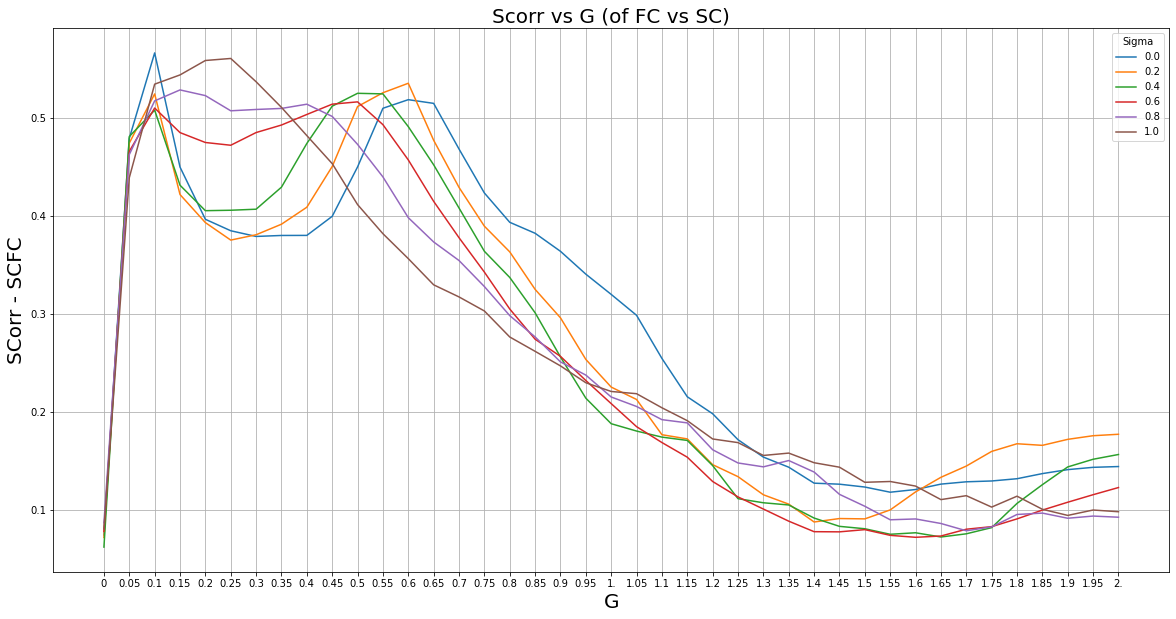

In [4]:
# Graph it: 
plt.plot(S0[0],S0[1])
plt.plot(S1[0],S1[1])
plt.plot(S2[0],S2[1])
plt.plot(S3[0],S3[1])
plt.plot(S4[0],S4[1])
plt.plot(S5[0],S5[1])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - SCFC', fontsize=20)
plt.title('Scorr vs G (of FC vs SC)', fontsize=20)
plt.grid()
plt.legend(('0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()

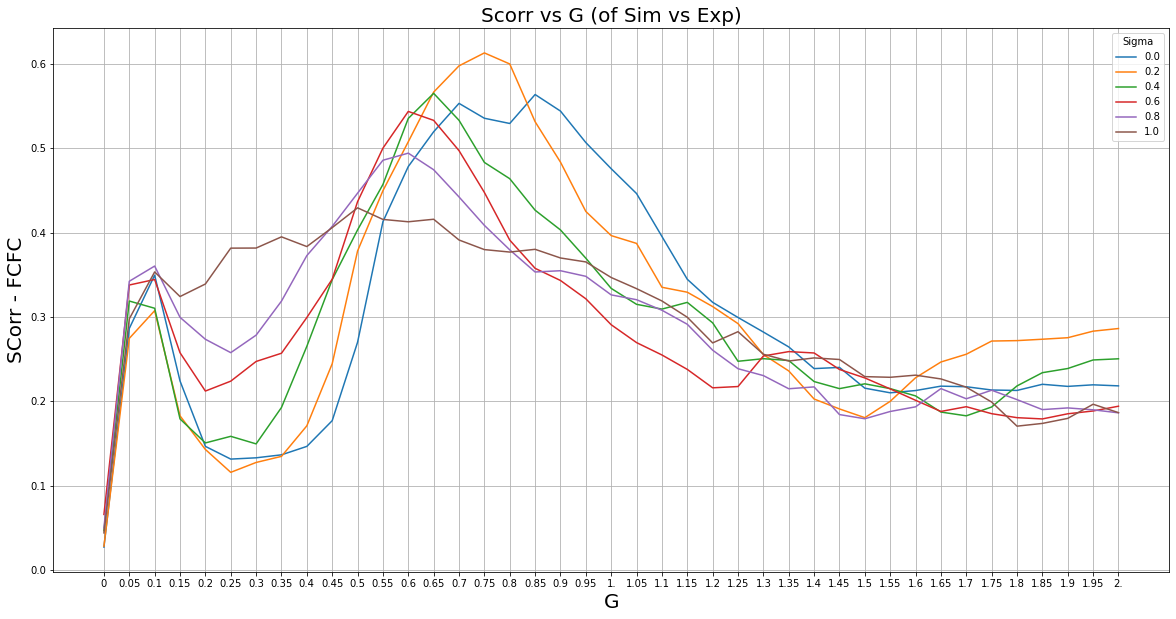

In [5]:
# Graph it: 
plt.plot(S0[0],S0[2])
plt.plot(S1[0],S1[2])
plt.plot(S2[0],S2[2])
plt.plot(S3[0],S3[2])
plt.plot(S4[0],S4[2])
plt.plot(S5[0],S5[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('Scorr vs G (of Sim vs Exp)', fontsize=20)
plt.grid()
plt.legend(('0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


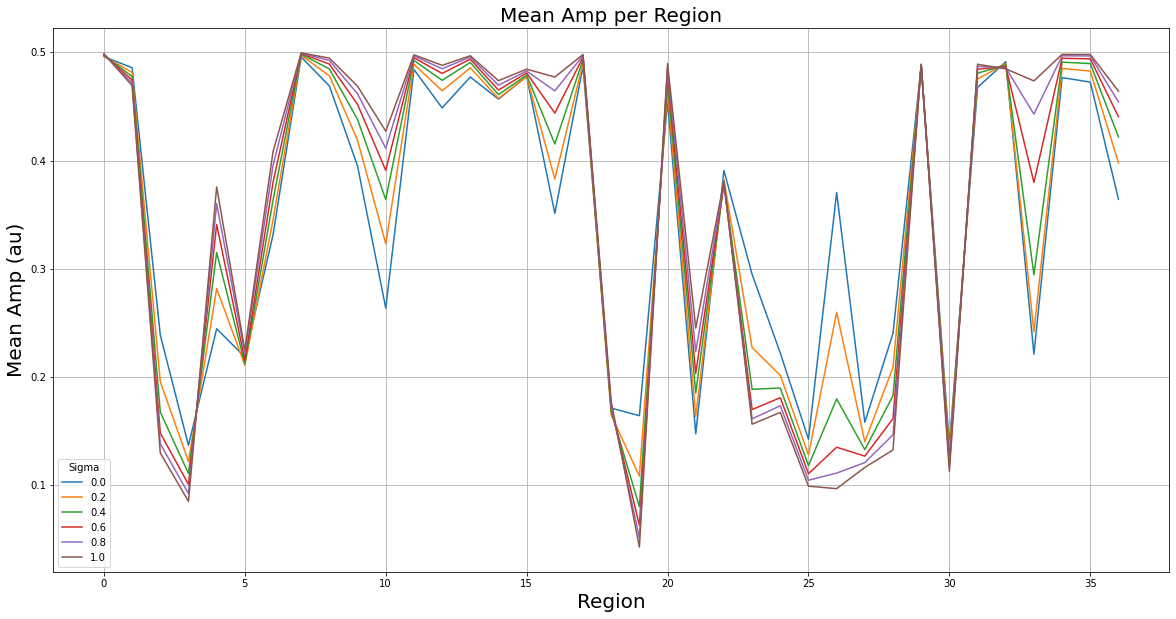

In [6]:
# Peaks is at: do-not-track\\LCycle_G[0.75]_MouseCortex_Scorr_20200805-031253_.csv

TFiles = glob.glob("do-not-track/Old/5_8_20/LCycle_G[0.75*Tseries*_.csv")

for item in TFiles:
    df = np.genfromtxt(item,delimiter="\t")
    bold_time = df[0]
    bold_data = df[1:]
    XX = list(map(np.median,bold_data))

    plt.plot(XX)

plt.grid()
plt.xlabel('Region', fontsize=20)
plt.ylabel('Mean Amp (au)', fontsize=20)
plt.title('Mean Amp per Region', fontsize=20)
plt.legend(("0.0","0.2","0.4","0.6","0.8","1.0"),title="Sigma")

# 2nd Order Het


In [8]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
# LCycleCut 2nd Order
Scorr_files = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.0*Scorr*.csv")

# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

['D:\\Simulations\\2020_09_10\\LCycleCut_G[0.05]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210045_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.15]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205830_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.1]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205858_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.25]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210129_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.2]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210057_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.35]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205930_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.3]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210134_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.45]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210019_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.4]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205909_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.55]sig_e0.0sig

In [9]:
# Naming sense:
# 0 = 0 , 1 = 0.2, 2 = 0.4... 5 = 1
# 1st digit corresonds to sig_e, 2nd digit corresponds to sig_i

Files_S00 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.0*Scorr*.csv")
Files_S01 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.2*Scorr*.csv")
Files_S02 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.4*Scorr*.csv")
Files_S03 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.6*Scorr*.csv")
Files_S04 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.8*Scorr*.csv")
Files_S05 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i1.0*Scorr*.csv")

Files_S10 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.0*Scorr*.csv")
Files_S11 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.2*Scorr*.csv")
Files_S12 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.4*Scorr*.csv")
Files_S13 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.6*Scorr*.csv")
Files_S14 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.8*Scorr*.csv")
Files_S15 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i1.0*Scorr*.csv")

Files_S20 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.0*Scorr*.csv")
Files_S21 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.2*Scorr*.csv")
Files_S22 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.4*Scorr*.csv")
Files_S23 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.6*Scorr*.csv")
Files_S24 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.8*Scorr*.csv")
Files_S25 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i1.0*Scorr*.csv")

Files_S30 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.0*Scorr*.csv")
Files_S31 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.2*Scorr*.csv")
Files_S32 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.4*Scorr*.csv")
Files_S33 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.6*Scorr*.csv")
Files_S34 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.8*Scorr*.csv")
Files_S35 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i1.0*Scorr*.csv")

Files_S40 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.0*Scorr*.csv")
Files_S41 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.2*Scorr*.csv")
Files_S42 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.4*Scorr*.csv")
Files_S43 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.6*Scorr*.csv")
Files_S44 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.8*Scorr*.csv")
Files_S45 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i1.0*Scorr*.csv")

Files_S50 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.0*Scorr*.csv")
Files_S51 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.2*Scorr*.csv")
Files_S52 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.4*Scorr*.csv")
Files_S53 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.6*Scorr*.csv")
Files_S54 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.8*Scorr*.csv")
Files_S55 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i1.0*Scorr*.csv")

S00 = SCFC_sort(Files_S00)
S01 = SCFC_sort(Files_S01)
S02 = SCFC_sort(Files_S02)
S03 = SCFC_sort(Files_S03)
S04 = SCFC_sort(Files_S04)
S05 = SCFC_sort(Files_S05)

S10 = SCFC_sort(Files_S10)
S11 = SCFC_sort(Files_S11)
S12 = SCFC_sort(Files_S12)
S13 = SCFC_sort(Files_S13)
S14 = SCFC_sort(Files_S14)
S15 = SCFC_sort(Files_S15)

S20 = SCFC_sort(Files_S20)
S21 = SCFC_sort(Files_S21)
S22 = SCFC_sort(Files_S22)
S23 = SCFC_sort(Files_S23)
S24 = SCFC_sort(Files_S24)
S25 = SCFC_sort(Files_S25)

S30 = SCFC_sort(Files_S30)
S31 = SCFC_sort(Files_S31)
S32 = SCFC_sort(Files_S32)
S33 = SCFC_sort(Files_S33)
S34 = SCFC_sort(Files_S34)
S35 = SCFC_sort(Files_S35)

S40 = SCFC_sort(Files_S40)
S41 = SCFC_sort(Files_S41)
S42 = SCFC_sort(Files_S42)
S43 = SCFC_sort(Files_S43)
S44 = SCFC_sort(Files_S44)
S45 = SCFC_sort(Files_S45)

S50 = SCFC_sort(Files_S50)
S51 = SCFC_sort(Files_S51)
S52 = SCFC_sort(Files_S52)
S53 = SCFC_sort(Files_S53)
S54 = SCFC_sort(Files_S54)
S55 = SCFC_sort(Files_S55)

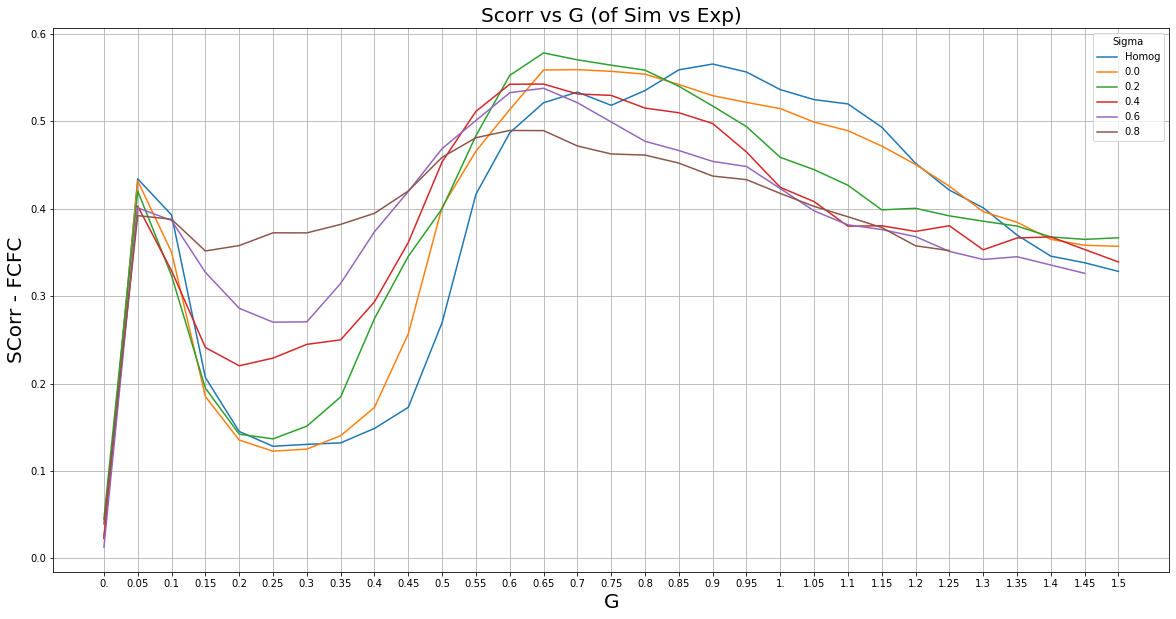

In [10]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S11[0],S11[2])
plt.plot(S22[0],S22[2])
plt.plot(S33[0],S33[2])
plt.plot(S44[0],S44[2])
plt.plot(S55[0],S55[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('First Order Het', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


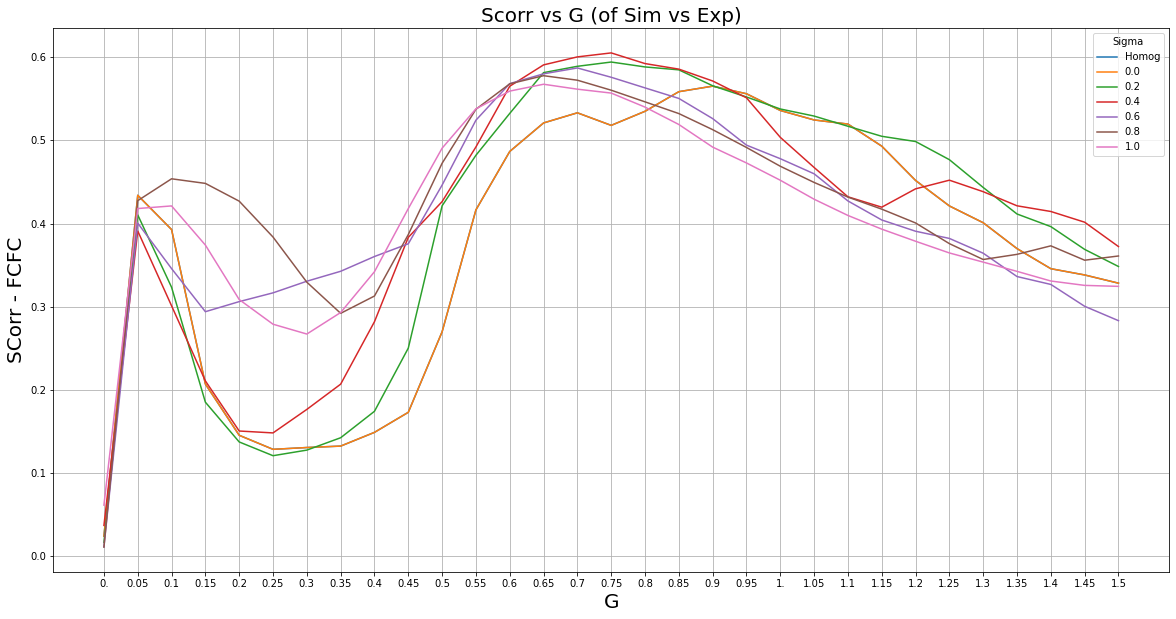

In [11]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S00[0],S00[2])
plt.plot(S01[0],S01[2])
plt.plot(S02[0],S02[2])
plt.plot(S03[0],S03[2])
plt.plot(S04[0],S04[2])
plt.plot(S05[0],S05[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()
# Sige = 0


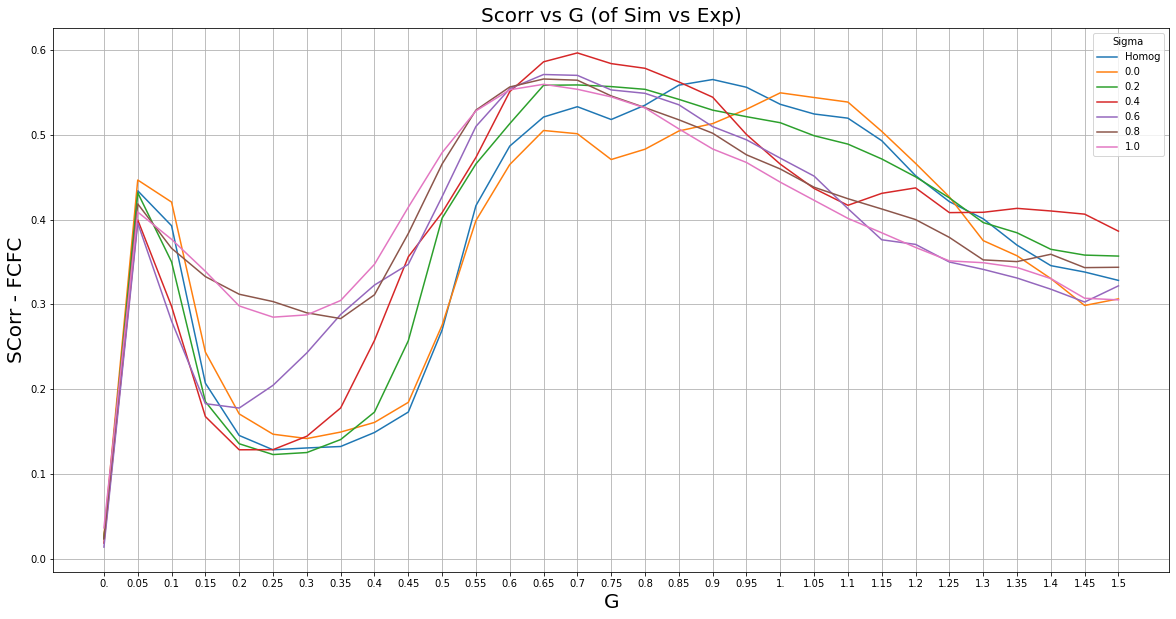

In [12]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S10[0],S10[2])
plt.plot(S11[0],S11[2])
plt.plot(S12[0],S12[2])
plt.plot(S13[0],S13[2])
plt.plot(S14[0],S14[2])
plt.plot(S15[0],S15[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.2', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


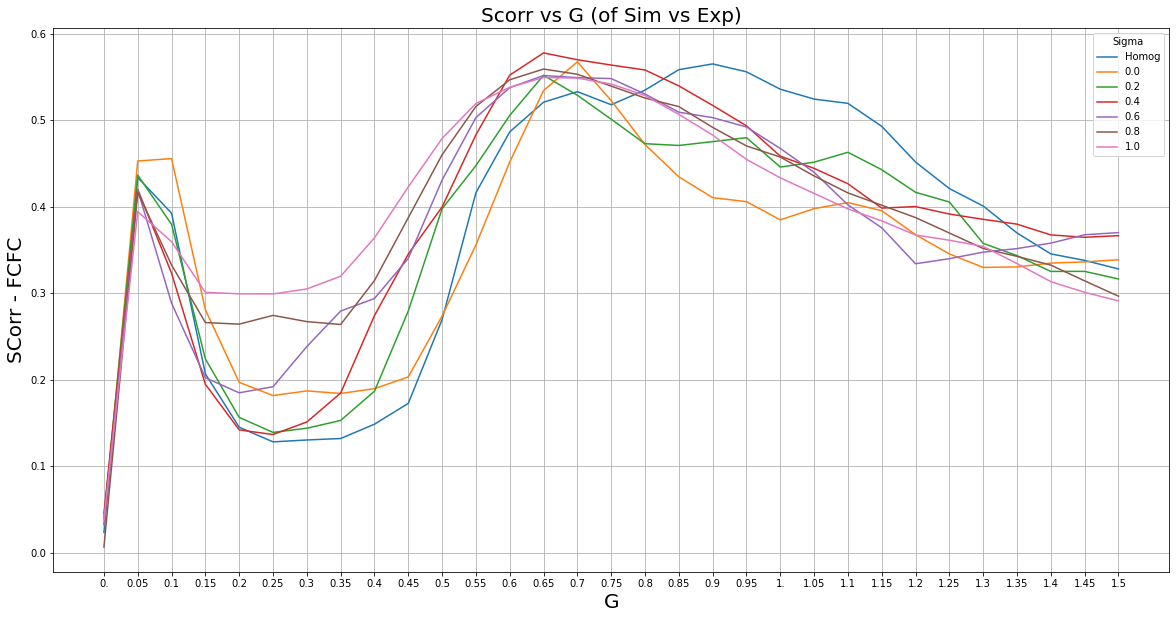

In [13]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S20[0],S20[2])
plt.plot(S21[0],S21[2])
plt.plot(S22[0],S22[2])
plt.plot(S23[0],S23[2])
plt.plot(S24[0],S24[2])
plt.plot(S25[0],S25[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.4', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


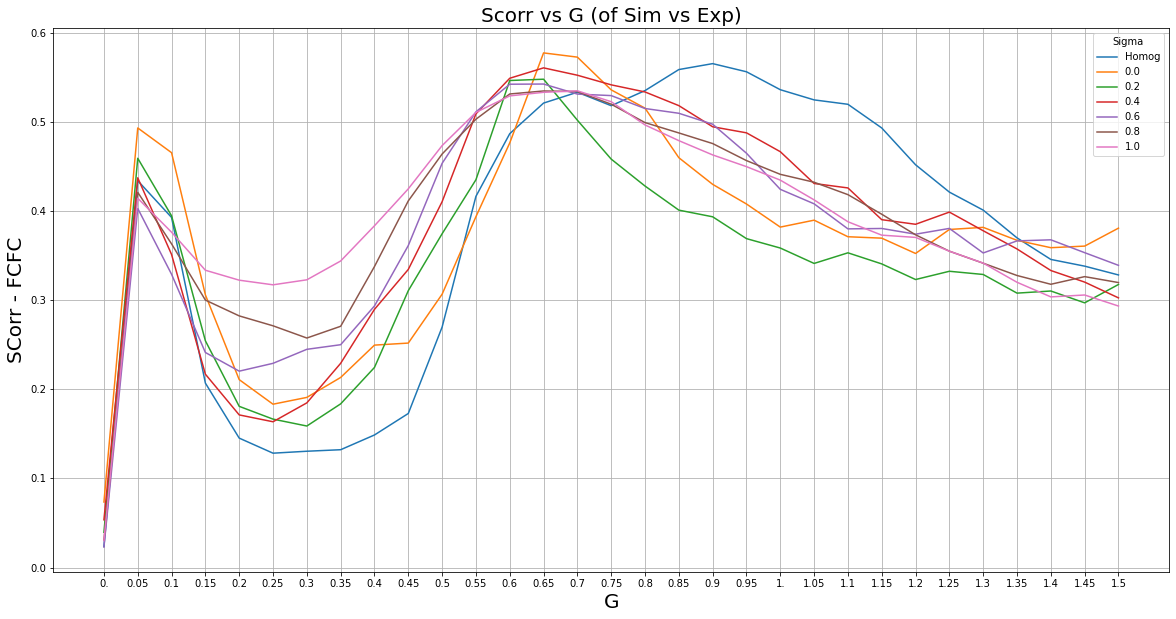

In [14]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S30[0],S30[2])
plt.plot(S31[0],S31[2])
plt.plot(S32[0],S32[2])
plt.plot(S33[0],S33[2])
plt.plot(S34[0],S34[2])
plt.plot(S35[0],S35[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.6', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


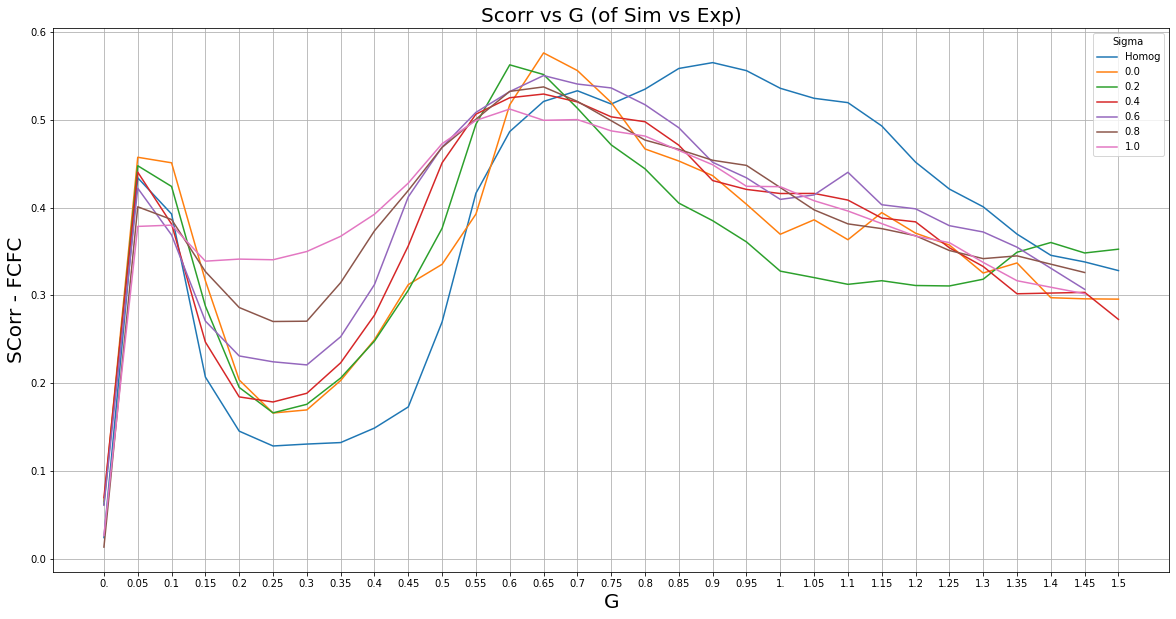

In [15]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S40[0],S40[2])
plt.plot(S41[0],S41[2])
plt.plot(S42[0],S42[2])
plt.plot(S43[0],S43[2])
plt.plot(S44[0],S44[2])
plt.plot(S45[0],S45[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.8', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


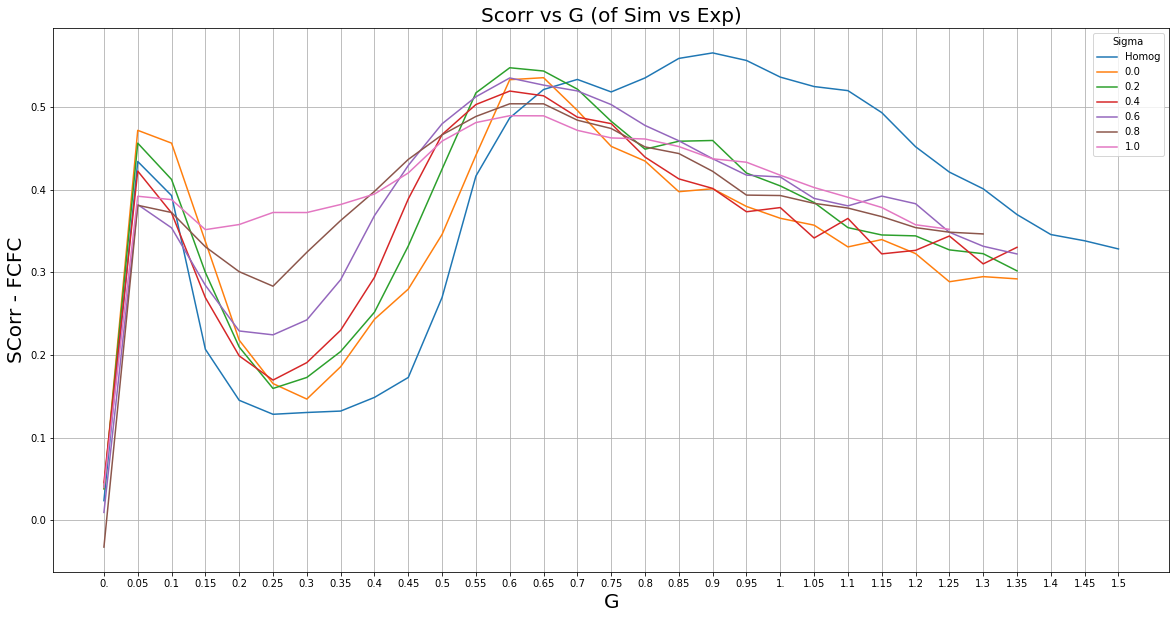

In [16]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S50[0],S50[2])
plt.plot(S51[0],S51[2])
plt.plot(S52[0],S52[2])
plt.plot(S53[0],S53[2])
plt.plot(S54[0],S54[2])
plt.plot(S55[0],S55[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 1.0', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


# Sweep of $G$ and $B_e$ for Homog

In [2]:
import re
# RegEx module

In [23]:
string = "LCycle_G[0.]_b_e[0.8]_MouseCortex_FCM"
#x = re.findall("[[].*[]].*[[].*[]]",string)
x = re.findall("\[(.*)\].*\[(.*)\]",string)

In [38]:
SCorr_files = glob.glob(r"D:\Simulations\2020_09_18\*Scorr*.csv")

In [62]:
Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    x = re.findall("\[(.*)\].*\[(.*)\]",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G', 'B_e']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [64]:
df

,G,B_e,SCFC,FCFC
0,0.05,0.2,0.492349,0.302837
1,0.05,0.4,0.529850,0.327160
2,0.05,0.6,0.542614,0.335636
3,0.05,0.8,0.539088,0.315868
4,0.05,0.,0.441156,0.286519
...,...,...,...,...
660,2.,2.4,0.193188,0.303312
661,2.,2.6,0.225299,0.347175
662,2.,2.8,0.234418,0.328137
663,2.,2.,0.112415,0.201134
